 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [35]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [36]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [37]:
# Count nulls
whale_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [38]:
# Drop nulls
whale_returns = whale_returns.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [39]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [40]:
# Count nulls
algo_returns.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [41]:
# Drop nulls
algo_returns = algo_returns.dropna()

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [42]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [43]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [44]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.strip("$")
sp500_history["Close"] = sp500_history["Close"].astype(float)

sp500_history = sp500_history.sort_index()

sp500_history.head(5)

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [45]:
# Calculate Daily Returns
sp500_history["Close"] = sp500_history.pct_change()
sp500_history.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [46]:
# Drop nulls
sp500_history = sp500_history.dropna()
sp500_history.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [47]:
# Rename Column
sp500_history = sp500_history.rename(columns={"Close":"S&P 500"})
sp500_history.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [48]:
# Concatenate all DataFrames into a single DataFrame
df = pd.concat([sp500_history, whale_returns, algo_returns], axis="columns", join="inner")

df.head()

,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.004539,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,-0.004389,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.001196,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.014174,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,0.003944,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

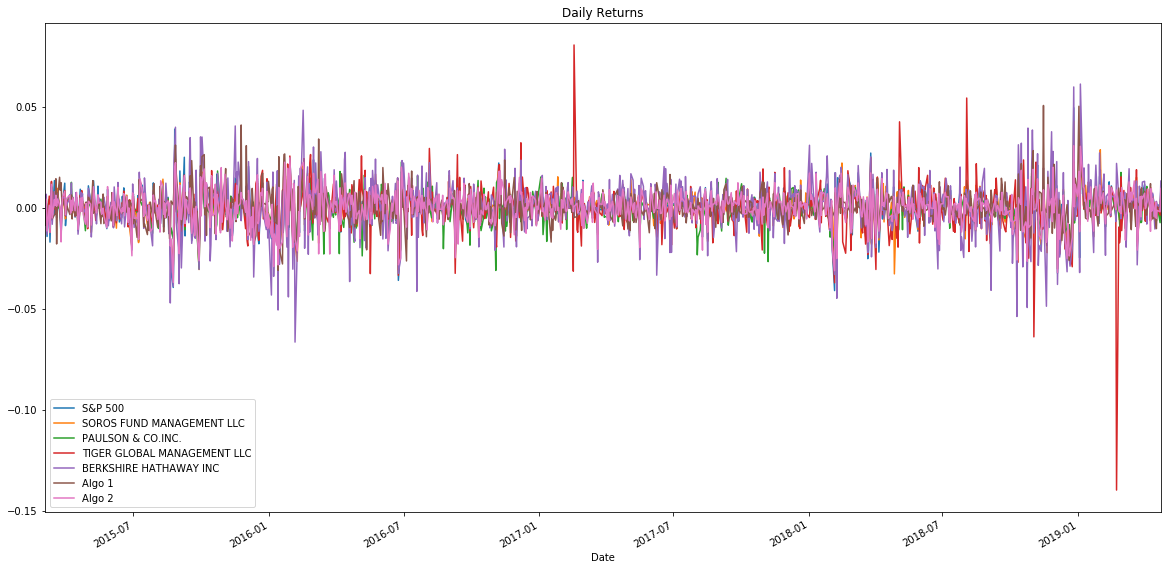

In [49]:
# Plot daily returns

df.plot(title="Daily Returns", figsize=(20,10))


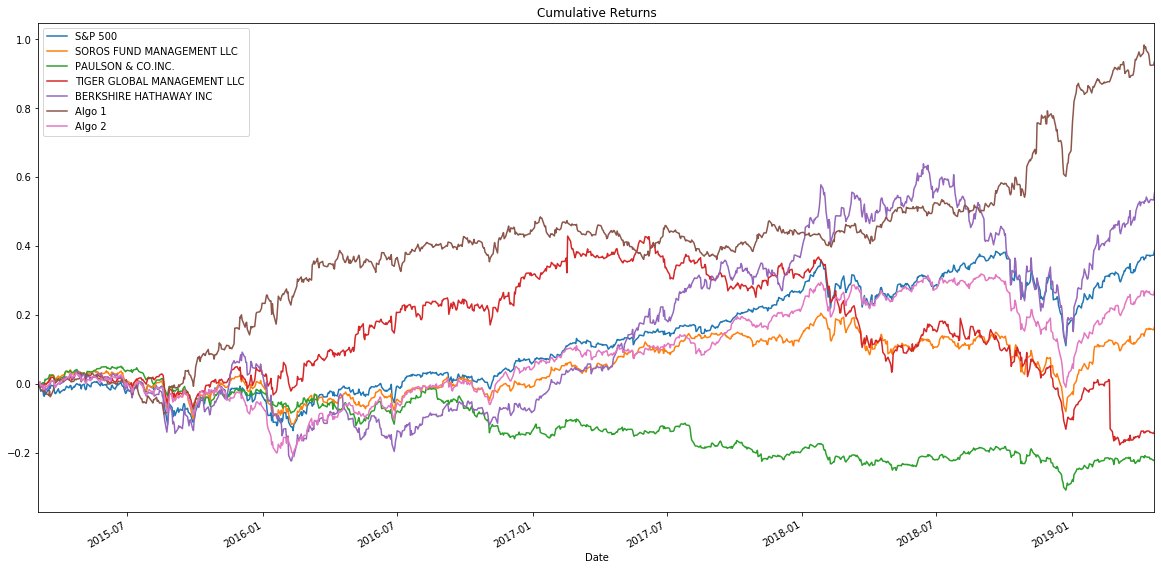

In [50]:
# Plot cumulative returns
((df + 1).cumprod() - 1).plot(title="Cumulative Returns", figsize=(20,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

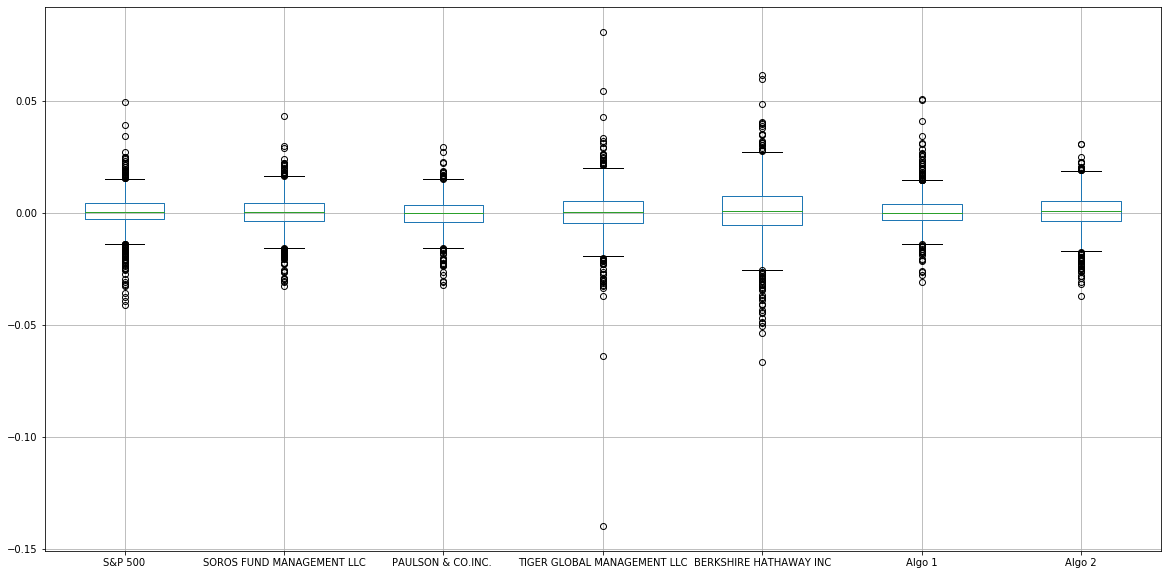

In [51]:
# Box plot to visually show risk

df.boxplot(figsize=(20,10))

In [52]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
df_std = df.std()
df_std

S&P 500                        0.008554
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
dtype: float64

In [53]:
# Determine which portfolios are riskier than the S&P 500
df_std > df_std.loc["S&P 500"]

S&P 500                        False
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
dtype: bool

In [54]:
# Calculate the annualized standard deviation (252 trading days)
df_std * np.sqrt(252)

S&P 500                        0.135786
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

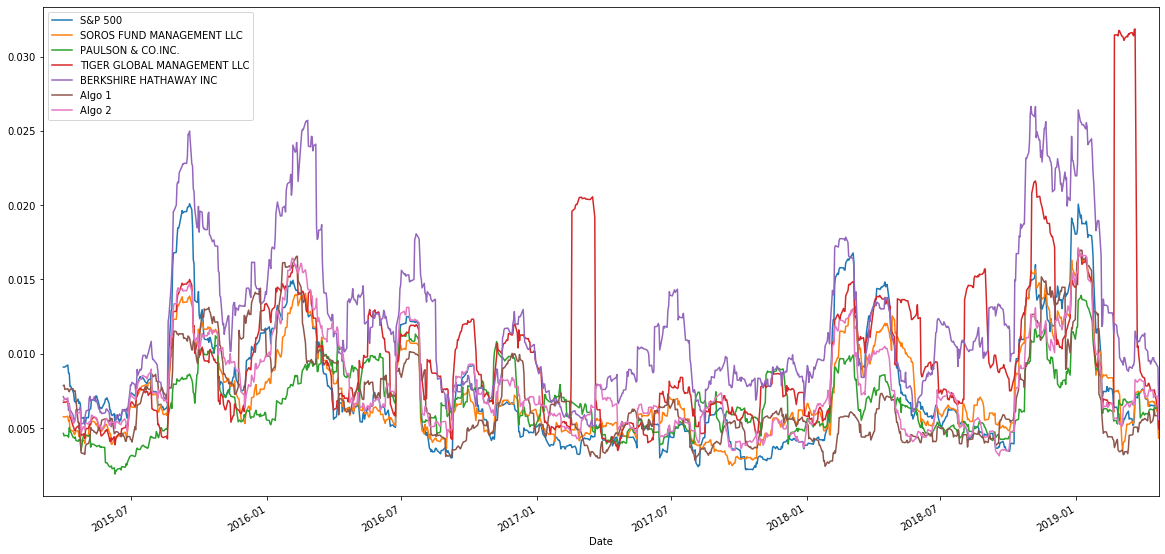

In [55]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
df.rolling(21).std().plot(figsize=(20,10))


In [56]:
# Construct a correlation table
df.corr()

,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
S&P 500,1.000000,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764
SOROS FUND MANAGEMENT LLC,0.837864,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873
PAULSON & CO.INC.,0.669732,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152
TIGER GLOBAL MANAGEMENT LLC,0.623946,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414
BERKSHIRE HATHAWAY INC,0.751371,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082
Algo 1,0.279494,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243
Algo 2,0.858764,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000


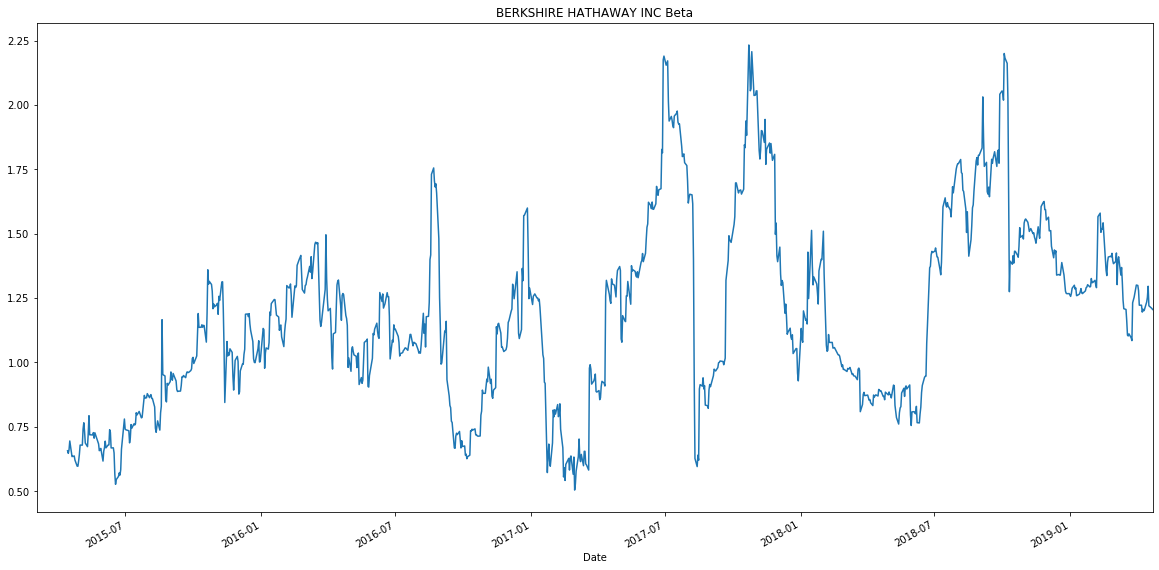

In [57]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
df_cov = df.rolling(window=30).cov(df["S&P 500"])
rolling_var = df["S&P 500"].rolling(window=30).var()


rolling_beta = df_cov["BERKSHIRE HATHAWAY INC"] / rolling_var
rolling_beta.plot(title="BERKSHIRE HATHAWAY INC Beta",figsize=(20,10))



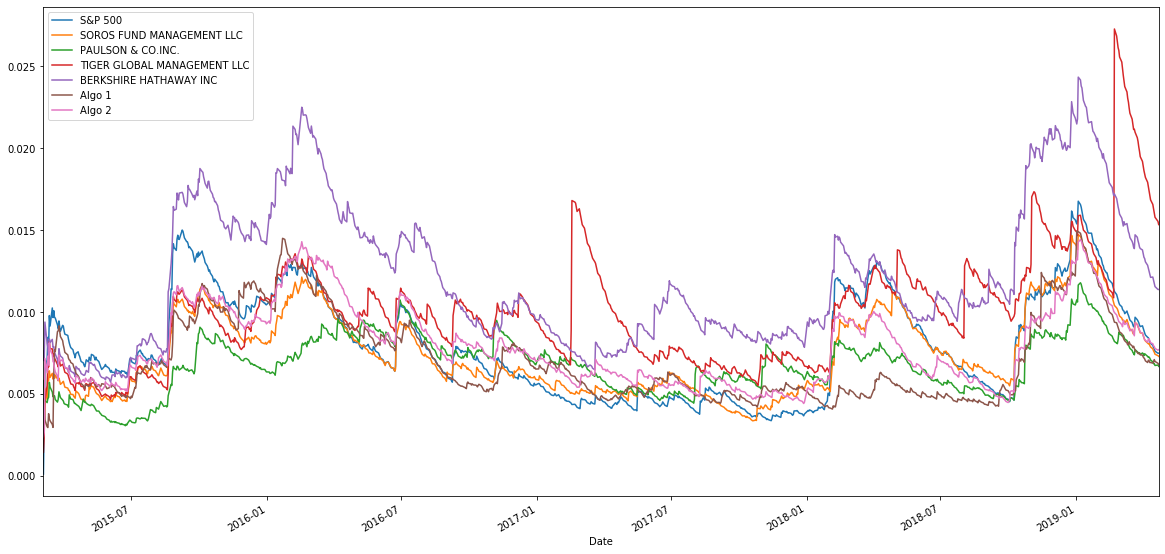

In [58]:
# Calculate a rolling window using the exponentially weighted moving average. 
df_ema = df.ewm(halflife=21).std()
df_ema.plot(figsize=(20,10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [59]:
# Calculate annualized Sharpe Ratios
sr = df.mean() / df.std() * np.sqrt(252)
sr

S&P 500                        0.648267
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
dtype: float64

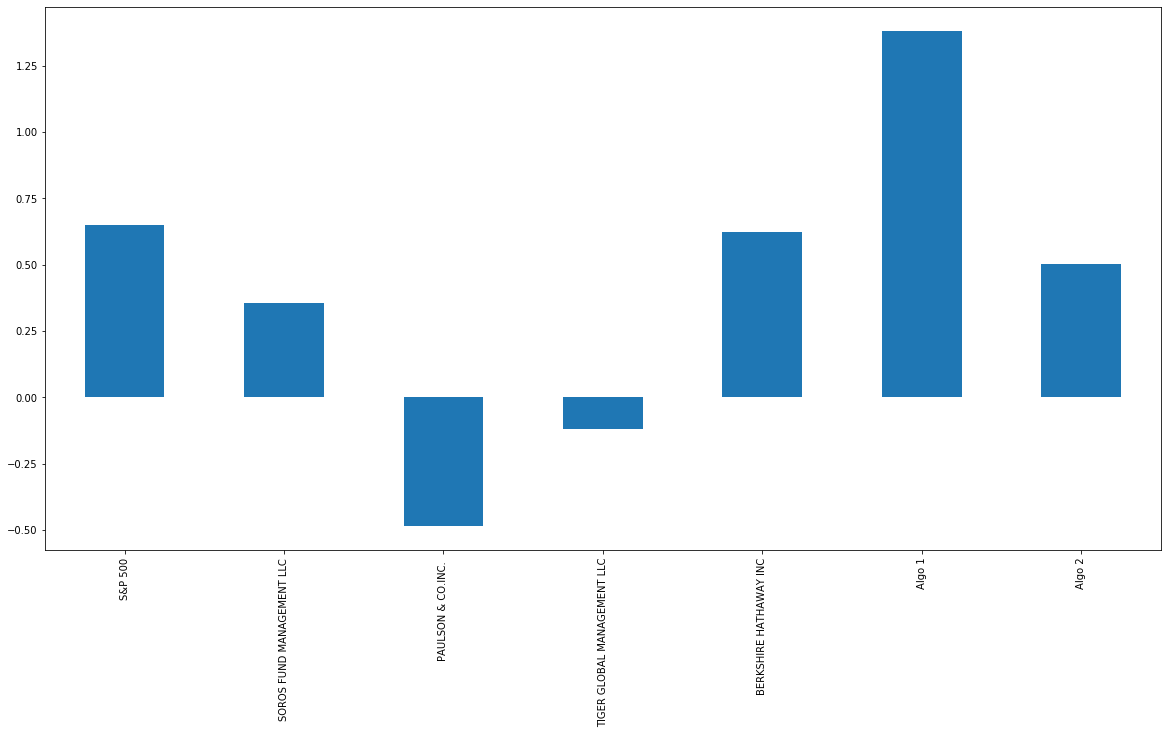

In [60]:
# Visualize the sharpe ratios as a bar plot
sr.plot(kind="bar", figsize=(20,10))

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [61]:
# Read the first stock
auy_file = Path("Resources/auy.csv")
auy = pd.read_csv(auy_file, index_col="Date", infer_datetime_format=True)
auy.head()

,Close,Symbol
Date,,
6/25/2018 16:00:00,2.98,AUY
6/26/2018 16:00:00,2.96,AUY
6/27/2018 16:00:00,2.90,AUY
6/28/2018 16:00:00,2.88,AUY
6/29/2018 16:00:00,2.90,AUY


In [62]:
# Read the second stock
cmls_file = Path("Resources/cmls.csv")
cmls = pd.read_csv(cmls_file, index_col="Date", infer_datetime_format=True)
cmls.head()

,Close,Symbol
Date,,
6/25/2018 16:00:00,15.00,CMLS
7/27/2018 16:00:00,15.00,CMLS
8/1/2018 16:00:00,18.10,CMLS
8/2/2018 16:00:00,18.00,CMLS
8/3/2018 16:00:00,19.61,CMLS


In [63]:
# Read the third stock
maxr_file = Path("Resources/maxr.csv")
maxr = pd.read_csv(maxr_file, index_col="Date", infer_datetime_format=True)
maxr.head()

,Close,Symbol
Date,,
6/25/2018 16:00:00,48.80,MAXR
6/26/2018 16:00:00,48.86,MAXR
6/27/2018 16:00:00,48.68,MAXR
6/28/2018 16:00:00,49.15,MAXR
6/29/2018 16:00:00,50.52,MAXR


In [64]:
# Read the fourth stock
nmrk_file = Path("Resources/nmrk.csv")
nmrk = pd.read_csv(nmrk_file, index_col="Date", infer_datetime_format=True)
nmrk.head()

,Close,Symbol
Date,,
6/25/2018 16:00:00,14.88,NMRK
6/26/2018 16:00:00,14.85,NMRK
6/27/2018 16:00:00,14.28,NMRK
6/28/2018 16:00:00,14.26,NMRK
6/29/2018 16:00:00,14.23,NMRK


In [65]:
# Read the fifth stock
wow_file = Path("Resources/wow.csv")
wow = pd.read_csv(wow_file, index_col="Date", infer_datetime_format=True)
wow.head()

,Close,Symbol
Date,,
6/25/2018 16:00:00,9.74,WOW
6/26/2018 16:00:00,9.70,WOW
6/27/2018 16:00:00,9.57,WOW
6/28/2018 16:00:00,9.66,WOW
6/29/2018 16:00:00,9.66,WOW


In [66]:
# Concatenate all stock sinto a single DataFrame
portfolio = pd.concat([wow, auy, maxr, nmrk, cmls], axis=0)
# portfolio.drop(columns="Symbol", inplace=True)
# portfolio.columns = ["WOW", "AUY", "MAXR", "NMRK", "CMLS"]
portfolio.head()

,Close,Symbol
Date,,
6/25/2018 16:00:00,9.74,WOW
6/26/2018 16:00:00,9.70,WOW
6/27/2018 16:00:00,9.57,WOW
6/28/2018 16:00:00,9.66,WOW
6/29/2018 16:00:00,9.66,WOW


In [67]:
# Reset the index
from datetime import datetime, date
portfolio.reset_index(inplace=True)
portfolio["Date"] = pd.to_datetime(portfolio["Date"]).dt.date
portfolio.head()

,Date,Close,Symbol
0,2018-06-25,9.74,WOW
1,2018-06-26,9.70,WOW
2,2018-06-27,9.57,WOW
3,2018-06-28,9.66,WOW
4,2018-06-29,9.66,WOW


In [68]:
# Pivot so that each column of prices represents a unique symbol
portfolio = portfolio.pivot(index="Date", columns="Symbol", values="Close")
# portfolio

In [69]:
# Drop Nulls
portfolio.dropna(inplace=True)
portfolio.head()

Symbol,AUY,CMLS,MAXR,NMRK,WOW
Date,,,,,
2018-06-25,2.98,15.00,48.80,14.88,9.74
2018-07-27,3.04,15.00,51.95,14.21,10.40
2018-08-01,3.17,18.10,45.91,13.83,10.98
2018-08-02,3.06,18.00,45.77,13.35,10.77
2018-08-03,3.10,19.61,44.46,13.18,10.91


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [70]:
# Calculate weighted portfolio returns
weights = [1/5, 1/5, 1/5, 1/5, 1/5]
returns = portfolio.pct_change().dropna()
weight_returns = (returns*weights).sum(axis=1) 
weight_returns.head()

Date
2018-07-27    0.021484
2018-08-01    0.032438
2018-08-02   -0.019421
2018-08-03    0.014832
2018-08-06    0.005312
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [71]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
df["Custom"] = weight_returns
df

,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Custom
Date,,,,,,,,
2015-03-03,-0.004539,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,NaN
2015-03-04,-0.004389,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,NaN
2015-03-05,0.001196,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,NaN
2015-03-06,-0.014174,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,NaN
2015-03-09,0.003944,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,NaN
2015-03-10,-0.016961,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,NaN
2015-03-11,-0.001918,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,NaN
2015-03-12,0.012601,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,NaN
2015-03-13,-0.006075,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,NaN


In [73]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
df.dropna(inplace=True)
df.head()

,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Custom
Date,,,,,,,,
2018-07-27,-0.006562,-0.008905,0.000373,-0.006623,-0.014417,-0.005066,-0.011983,0.021484
2018-08-01,-0.001037,-0.015330,-0.005112,-0.011223,0.000135,0.006178,-0.002942,0.032438
2018-08-02,0.004923,0.002427,-0.000982,0.002729,0.009181,-0.000459,0.004759,-0.019421
2018-08-03,0.004644,0.001796,0.013630,0.054425,-0.001707,-0.003656,0.002817,0.014832
2018-08-06,0.003538,0.006661,0.005636,-0.021611,0.008852,0.000529,0.000285,0.005312
2018-08-07,0.002824,-0.001868,0.003363,-0.008198,-0.001568,0.000207,-0.001330,-0.043383
2018-08-08,-0.000262,0.002018,0.005967,-0.010246,-0.004221,0.008429,-0.001812,-0.005950
2018-08-09,-0.001442,0.004563,-0.004652,-0.004623,-0.001590,0.003474,0.000550,-0.004256
2018-08-13,-0.004006,0.000000,0.000000,0.000000,0.000000,-0.004066,-0.006648,-0.009834


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [74]:
# Risk
new_df_std = df.std()
new_df_std

S&P 500                        0.010584
SOROS FUND MANAGEMENT LLC      0.010156
PAULSON & CO.INC.              0.007941
TIGER GLOBAL MANAGEMENT LLC    0.016279
BERKSHIRE HATHAWAY INC         0.016794
Algo 1                         0.009118
Algo 2                         0.009569
Custom                         0.019012
dtype: float64

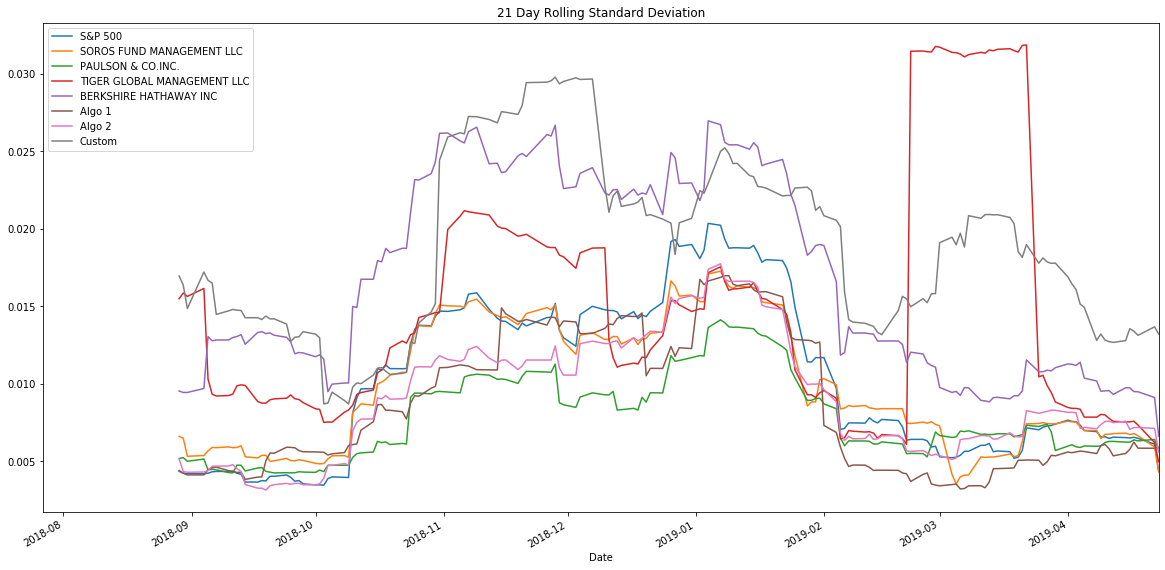

In [79]:
# Rolling
df.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")

In [80]:
# Annualized Sharpe Ratios
sr = df.mean() / df.std() * np.sqrt(252)
sr

S&P 500                        0.447828
SOROS FUND MANAGEMENT LLC      0.309099
PAULSON & CO.INC.             -0.165122
TIGER GLOBAL MANAGEMENT LLC   -1.454899
BERKSHIRE HATHAWAY INC         0.322958
Algo 1                         2.469250
Algo 2                        -0.312824
Custom                        -2.327709
dtype: float64

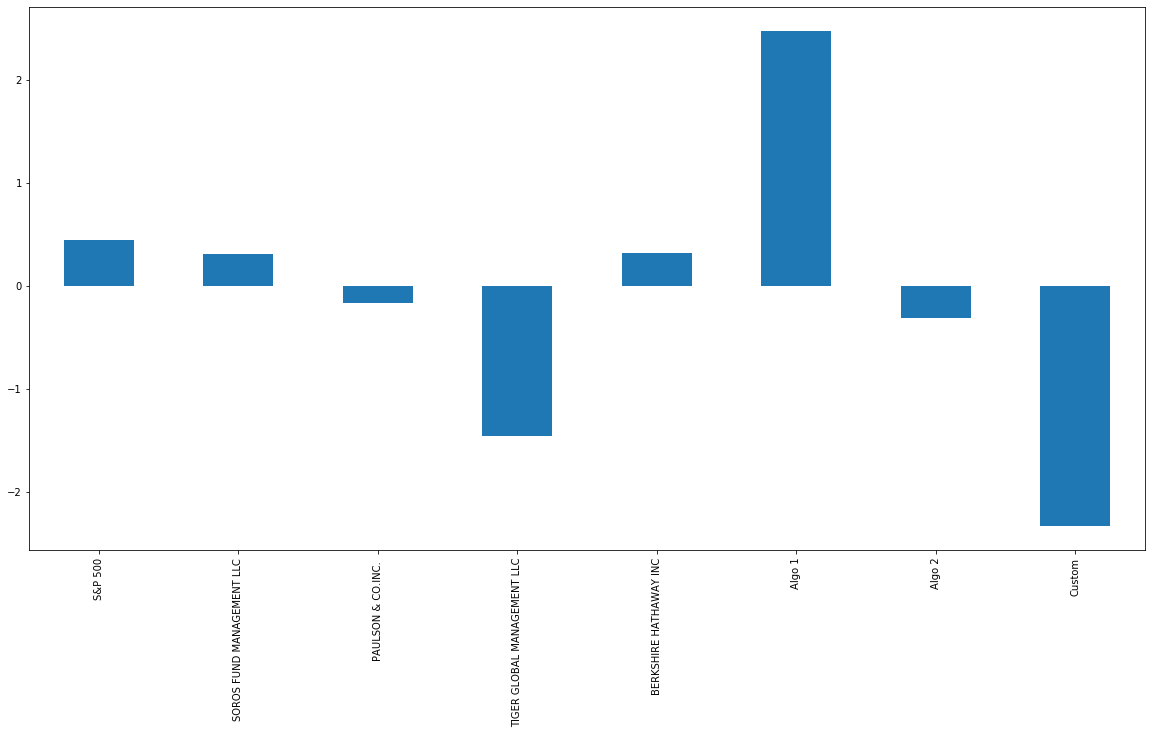

In [81]:
# Visualize the sharpe ratios as a bar plot
sr.plot(kind="bar", figsize=(20,10))

In [82]:
# Create a correlation analysis
df.corr()

,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Custom
S&P 500,1.000000,0.887330,0.784630,0.475083,0.864337,0.326363,0.893868,0.314217
SOROS FUND MANAGEMENT LLC,0.887330,1.000000,0.801077,0.464613,0.831653,0.368352,0.874645,0.343251
PAULSON & CO.INC.,0.784630,0.801077,1.000000,0.473855,0.674115,0.386427,0.798909,0.394809
TIGER GLOBAL MANAGEMENT LLC,0.475083,0.464613,0.473855,1.000000,0.320111,0.124320,0.387812,0.128613
BERKSHIRE HATHAWAY INC,0.864337,0.831653,0.674115,0.320111,1.000000,0.378686,0.806198,0.295881
Algo 1,0.326363,0.368352,0.386427,0.124320,0.378686,1.000000,0.411339,0.189013
Algo 2,0.893868,0.874645,0.798909,0.387812,0.806198,0.411339,1.000000,0.362812
Custom,0.314217,0.343251,0.394809,0.128613,0.295881,0.189013,0.362812,1.000000


,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Custom
Date,,,,,,,,
2019-04-16,0.000043,0.000041,0.000025,0.000039,0.000054,-1.256756e-06,0.000042,0.000044
2019-04-17,0.000041,0.000039,0.000023,0.000037,0.000053,-4.926824e-07,0.000038,0.000037
2019-04-18,0.000038,0.000036,0.000024,0.000032,0.000046,-1.086303e-06,0.000036,0.000032
2019-04-22,0.000037,0.000035,0.000024,0.000033,0.000045,-1.281288e-07,0.000036,0.000038
2019-04-23,0.000033,0.000031,0.000023,0.000032,0.000040,1.053167e-06,0.000032,0.000030


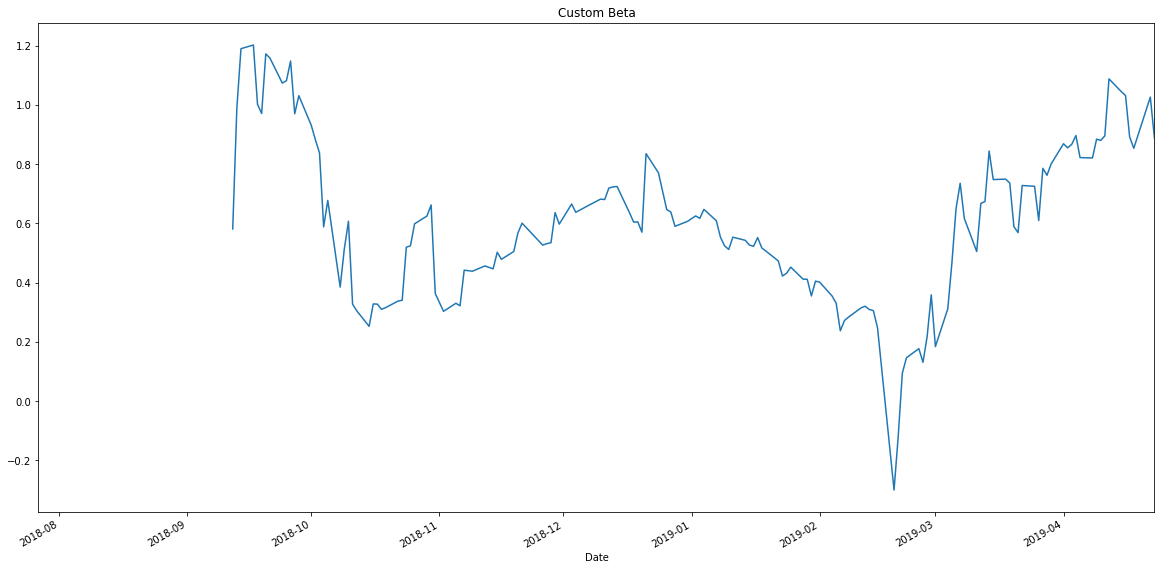

In [85]:
# Beta
df_cov = df.rolling(window=30).cov(df["S&P 500"])
rolling_var = df["S&P 500"].rolling(window=30).var()


rolling_beta = df_cov["Custom"] / rolling_var
rolling_beta.plot(title="Custom Beta",figsize=(20,10))